In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cement-manufacturing-concrete-dataset/concrete.csv


In [2]:
cement = pd.read_csv('/kaggle/input/cement-manufacturing-concrete-dataset/concrete.csv')

In [3]:
type(cement)

pandas.core.frame.DataFrame

In [4]:
cement.head

<bound method NDFrame.head of       cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
0        29.89  
1        23.51  
2     

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

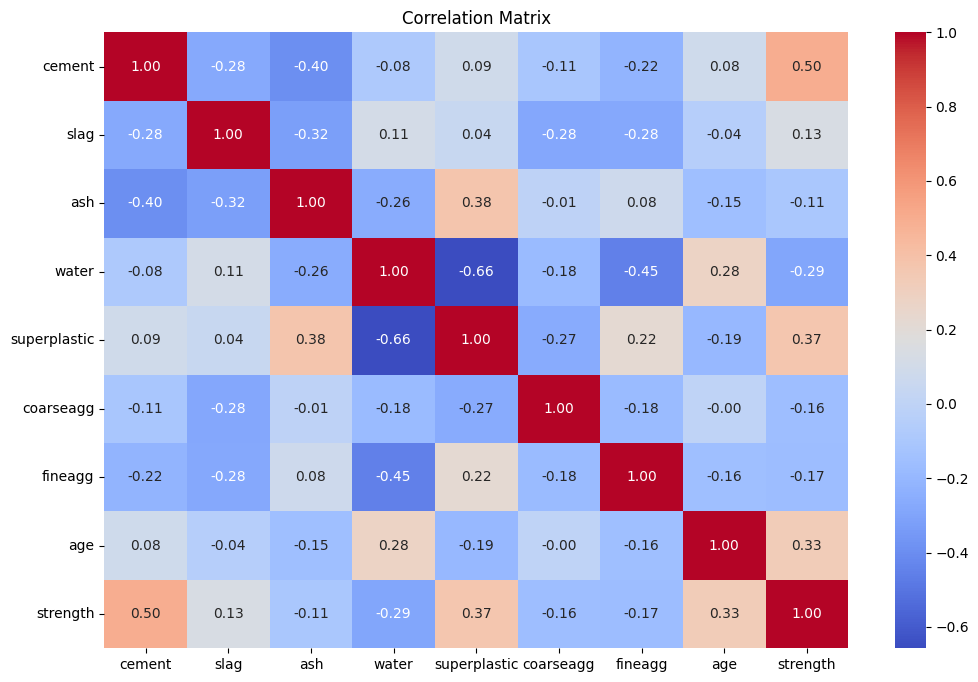

In [6]:
plt.figure(figsize=(12, 8))
correlation = cement.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='label'>

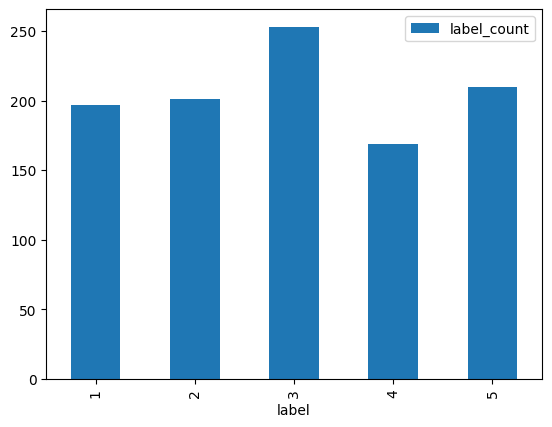

In [7]:
def strength_label(strength):
    if (strength < 20):
        return 1
    if (20 < strength < 30):
        return 2
    if (30 < strength < 40):
        return 3
    if (40 < strength < 50):
        return 4
    if (strength > 50):
        return 5

cement['label'] = cement['strength'].apply(strength_label) 
cement.to_csv("converted_concrete.csv", index=False) 
 
data_dist = cement.groupby('label') 
data_dist = pd.DataFrame({ 'label_count' : data_dist['label'].count(), }).reset_index() 
data_dist.plot.bar(x='label', y='label_count')

In [8]:
unique_age = cement['age'].unique()

unique_age.sort()

age_dict = {age:i+1 for i, age in enumerate(unique_age)}

cement['age'] = cement['age'].map(age_dict)

cement.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,label
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,5,29.89,2
1,168.90,42.20,124.30,158.30,10.80,1080.80,796.20,4,23.51,2
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,5,29.22,2
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,5,45.85,4
4,154.80,183.40,0.00,193.30,9.10,1047.40,696.70,5,18.29,1


In [9]:
norm_columns = [e for e in cement.columns if e not in ['age', 'strength', 'label']] 

cement[norm_columns] = cement[norm_columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [10]:
cement.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,label
0,0.09,0.59,0.00,0.65,0.00,0.50,0.39,5,29.89,2
1,0.15,0.12,0.62,0.29,0.34,0.81,0.51,4,23.51,2
2,0.34,0.00,0.48,0.52,0.17,0.45,0.67,5,29.22,2
3,0.37,0.32,0.00,0.85,0.00,0.38,0.19,5,45.85,4
4,0.12,0.51,0.00,0.57,0.28,0.72,0.26,5,18.29,1


In [11]:
normalize_cement = cement.copy()

normalize_cement.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,label
0,0.09,0.59,0.00,0.65,0.00,0.50,0.39,5,29.89,2
1,0.15,0.12,0.62,0.29,0.34,0.81,0.51,4,23.51,2
2,0.34,0.00,0.48,0.52,0.17,0.45,0.67,5,29.22,2
3,0.37,0.32,0.00,0.85,0.00,0.38,0.19,5,45.85,4
4,0.12,0.51,0.00,0.57,0.28,0.72,0.26,5,18.29,1


In [12]:
normalize_cement.to_csv("normalize_cement.csv")

In [13]:
print(normalize_cement.cov())  

              cement  slag   ash  water  superplastic  coarseagg  fineagg  \
cement          0.06 -0.02 -0.03  -0.00          0.00      -0.01    -0.01   
slag           -0.02  0.06 -0.02   0.00          0.00      -0.02    -0.01   
ash            -0.03 -0.02  0.10  -0.01          0.02      -0.00     0.01   
water          -0.00  0.00 -0.01   0.03         -0.02      -0.01    -0.02   
superplastic    0.00  0.00  0.02  -0.02          0.03      -0.01     0.01   
coarseagg      -0.01 -0.02 -0.00  -0.01         -0.01       0.05    -0.01   
fineagg        -0.01 -0.01  0.01  -0.02          0.01      -0.01     0.04   
age             0.02 -0.03 -0.05   0.09         -0.05      -0.00    -0.06   
strength        1.98  0.54 -0.57  -0.83          1.13      -0.62    -0.56   
label           0.16  0.03 -0.04  -0.06          0.09      -0.05    -0.05   

               age  strength  label  
cement        0.02      1.98   0.16  
slag         -0.03      0.54   0.03  
ash          -0.05     -0.57  -0.04  


In [14]:
cement['cement_slag'] = cement['cement'].cov(cement['slag']) 
cement['cement_ash'] = cement['cement'].cov(cement['ash'] )
cement['water_fineagg'] = cement['water'].cov(cement['fineagg'] )
cement['ash_superplastic'] = cement['ash'].cov(cement['superplastic'] )

In [15]:
cement.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,label,cement_slag,cement_ash,water_fineagg,ash_superplastic
0,0.09,0.59,0.00,0.65,0.00,0.50,0.39,5,29.89,2,-0.02,-0.03,-0.02,0.02
1,0.15,0.12,0.62,0.29,0.34,0.81,0.51,4,23.51,2,-0.02,-0.03,-0.02,0.02
2,0.34,0.00,0.48,0.52,0.17,0.45,0.67,5,29.22,2,-0.02,-0.03,-0.02,0.02
3,0.37,0.32,0.00,0.85,0.00,0.38,0.19,5,45.85,4,-0.02,-0.03,-0.02,0.02
4,0.12,0.51,0.00,0.57,0.28,0.72,0.26,5,18.29,1,-0.02,-0.03,-0.02,0.02


In [16]:
corr_dict = ['cement', 'water', 'superplastic', 'age']

corr = cement[corr_dict].corrwith(cement['strength'])

print (corr)

cement          0.50
water          -0.29
superplastic    0.37
age             0.47
dtype: float64


In [17]:
corr_dict = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength', 'label', 'cement_slag', 'cement_ash', 'water_fineagg', 'ash_superplastic']

In [18]:
selected_corr_dict = ['cement', 'water', 'superplastic', 'age', 'strength', 'label', 'cement_slag', 'cement_ash', 'water_fineagg', 'ash_superplastic']

In [19]:
feature_cement = cement[corr_dict]
feature_cement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   ash               1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplastic      1030 non-null   float64
 5   coarseagg         1030 non-null   float64
 6   fineagg           1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
 9   label             1030 non-null   int64  
 10  cement_slag       1030 non-null   float64
 11  cement_ash        1030 non-null   float64
 12  water_fineagg     1030 non-null   float64
 13  ash_superplastic  1030 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 112.8 KB


In [20]:
selected_feature = cement[selected_corr_dict]
selected_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   water             1030 non-null   float64
 2   superplastic      1030 non-null   float64
 3   age               1030 non-null   int64  
 4   strength          1030 non-null   float64
 5   label             1030 non-null   int64  
 6   cement_slag       1030 non-null   float64
 7   cement_ash        1030 non-null   float64
 8   water_fineagg     1030 non-null   float64
 9   ash_superplastic  1030 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 80.6 KB


In [21]:
feature_cement.to_csv("feature_cement.csv")
selected_feature.to_csv("selected_feature.csv")

In [22]:
converted_cement = pd.read_csv("converted_concrete.csv")
normalize_cement = pd.read_csv("normalize_cement.csv")
feature_cement = pd.read_csv("feature_cement.csv")
selected_feature_cement = pd.read_csv("selected_feature.csv") 

In [26]:
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 

clf = DecisionTreeClassifier()   

#Model 1
feature_cols = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']
x = converted_cement[feature_cols] 
y = converted_cement['label']  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)  
clf = clf.fit(x_train, y_train)  
y_pred = clf.predict(x_test)  
print("Accuracy model 1: ", metrics.accuracy_score(y_test, y_pred))

#Model 2
feature_cols = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']
x = normalize_cement[feature_cols] # Feature
y = normalize_cement['label']  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)  
clf = clf.fit(x_train, y_train)  
y_pred = clf.predict(x_test)  
print("Accuracy model 2: ", metrics.accuracy_score(y_test, y_pred))

#Model 3
feature_cols = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'cement_slag', 'cement_ash', 'water_fineagg', 'ash_superplastic']
x = feature_cement[feature_cols] # Feature
y = feature_cement['label']  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)  
clf = clf.fit(x_train, y_train)  
y_pred = clf.predict(x_test)  
print("Accuracy model 3: ", metrics.accuracy_score(y_test, y_pred))

#Model 4
feature_cols = ['cement', 'water', 'superplastic', 'age']
x = selected_feature_cement[feature_cols] # Feature
y = selected_feature_cement['label']  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)  
clf = clf.fit(x_train, y_train)  
y_pred = clf.predict(x_test)  
print("Accuracy model 4: ", metrics.accuracy_score(y_test, y_pred))

#Model 5
feature_cols = ['cement', 'water', 'superplastic', 'age'] 
x = converted_cement[feature_cols] # Feature
y = converted_cement['label']  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)  
clf = clf.fit(x_train, y_train)  
y_pred = clf.predict(x_test)  
print("Accuracy model 5: ", metrics.accuracy_score(y_test, y_pred))

Accuracy model 1:  0.7119741100323624
Accuracy model 2:  0.6925566343042071
Accuracy model 3:  0.7378640776699029
Accuracy model 4:  0.6084142394822006
Accuracy model 5:  0.6051779935275081
